<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(2_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n250.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.945866,78.345773,31.512223,46.646612,-25.068156,177.382318,229.998888,-52.616570
1,0.0,1.0,95.837206,35.795618,65.018997,83.832801,71.780282,362.264905,263.820160,98.444745
2,0.0,2.0,48.563620,42.464114,57.927547,49.340340,27.222429,235.518049,218.675299,16.842751
3,0.0,3.0,39.954498,60.470564,64.981390,46.882897,42.509001,264.798351,241.421912,23.376439
4,0.0,4.0,54.374626,76.624742,93.626333,26.002308,-257.005112,3.622897,309.739341,-306.116444
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,90.075948,53.821711,98.102481,99.406777,174.660916,526.067832,392.878708,133.189125
119996,999.0,116.0,61.510982,72.853669,37.592646,95.930403,195.588488,473.476187,331.661372,141.814816
119997,999.0,117.0,48.168129,21.865138,44.255657,77.995902,-28.040878,174.243948,209.026629,-34.782681
119998,999.0,118.0,47.237580,91.836327,54.576714,95.880933,164.145446,463.677001,364.435246,99.241755


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.945866,78.345773,31.512223,46.646612,-25.068156,177.382318,229.998888,-52.616570
1,0.0,1.0,95.837206,35.795618,65.018997,83.832801,71.780282,362.264905,263.820160,98.444745
2,0.0,2.0,48.563620,42.464114,57.927547,49.340340,27.222429,235.518049,218.675299,16.842751
3,0.0,3.0,39.954498,60.470564,64.981390,46.882897,42.509001,264.798351,241.421912,23.376439
4,0.0,4.0,54.374626,76.624742,93.626333,26.002308,-257.005112,3.622897,309.739341,-306.116444
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,90.075948,53.821711,98.102481,99.406777,174.660916,526.067832,392.878708,133.189125
119996,999.0,116.0,61.510982,72.853669,37.592646,95.930403,195.588488,473.476187,331.661372,141.814816
119997,999.0,117.0,48.168129,21.865138,44.255657,77.995902,-28.040878,174.243948,209.026629,-34.782681
119998,999.0,118.0,47.237580,91.836327,54.576714,95.880933,164.145446,463.677001,364.435246,99.241755


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    35.945866  78.345773  31.512223  46.646612  -25.068156   
      1.0    95.837206  35.795618  65.018997  83.832801   71.780282   
      2.0    48.563620  42.464114  57.927547  49.340340   27.222429   
      3.0    39.954498  60.470564  64.981390  46.882897   42.509001   
      4.0    54.374626  76.624742  93.626333  26.002308 -257.005112   
...                ...        ...        ...        ...         ...   
999.0 115.0  90.075948  53.821711  98.102481  99.406777  174.660916   
      116.0  61.510982  72.853669  37.592646  95.930403  195.588488   
      117.0  48.168129  21.865138  44.255657  77.995902  -28.040878   
      118.0  47.237580  91.836327  54.576714  95.880933  164.145446   
      119.0  42.447307  26.875944  21.186647  71.686070   18.342734   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    177.382318  229.998888  -52.616570  
      1.0    362.264905  263.820160   98.444745  
      2.0    235.518049  218.675299   16.842751  
      3.0    264.798351  241.421912   23.376439  
      4.0      3.622897  309.739341 -306.116444  
...                 ...         ...         ...  
999.0 115.0  526.067832  392.878708  133.189125  
      116.0  473.476187  331.661372  141.814816  
      117.0  174.243948  209.026629  -34.782681  
      118.0  463.677001  364.435246   99.241755  
      119.0  190.538701  180.244602   10.294100  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    35.945866  78.345773  31.512223  46.646612  -25.068156   
      1.0    95.837206  35.795618  65.018997  83.832801   71.780282   
      2.0    48.563620  42.464114  57.927547  49.340340   27.222429   
      3.0    39.954498  60.470564  64.981390  46.882897   42.509001   
      4.0    54.374626  76.624742  93.626333  26.002308 -257.005112   
...                ...        ...        ...        ...         ...   
999.0 115.0  90.075948  53.821711  98.102481  99.406777  174.660916   
      116.0  61.510982  72.853669  37.592646  95.930403  195.588488   
      117.0  48.168129  21.865138  44.255657  77.995902  -28.040878   
      118.0  47.237580  91.836327  54.576714  95.880933  164.145446   
      119.0  42.447307  26.875944  21.186647  71.686070   18.342734   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    177.382318  229.998888  -52.616570  
      1.0    362.264905  263.820160   98.444745  
      2.0    235.518049  218.675299   16.842751  
      3.0    264.798351  241.421912   23.376439  
      4.0      3.622897  309.739341 -306.116444  
...                 ...         ...         ...  
999.0 115.0  526.067832  392.878708  133.189125  
      116.0  473.476187  331.661372  141.814816  
      117.0  174.243948  209.026629  -34.782681  
      118.0  463.677001  364.435246   99.241755  
      119.0  190.538701  180.244602   10.294100  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.945866,78.345773,31.512223,46.646612,-25.068156,177.382318,229.998888,-52.616570
1,0.0,1.0,95.837206,35.795618,65.018997,83.832801,71.780282,362.264905,263.820160,98.444745
2,0.0,2.0,48.563620,42.464114,57.927547,49.340340,27.222429,235.518049,218.675299,16.842751
3,0.0,3.0,39.954498,60.470564,64.981390,46.882897,42.509001,264.798351,241.421912,23.376439
4,0.0,4.0,54.374626,76.624742,93.626333,26.002308,-257.005112,3.622897,309.739341,-306.116444
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,90.075948,53.821711,98.102481,99.406777,174.660916,526.067832,392.878708,133.189125
119996,999.0,116.0,61.510982,72.853669,37.592646,95.930403,195.588488,473.476187,331.661372,141.814816
119997,999.0,117.0,48.168129,21.865138,44.255657,77.995902,-28.040878,174.243948,209.026629,-34.782681
119998,999.0,118.0,47.237580,91.836327,54.576714,95.880933,164.145446,463.677001,364.435246,99.241755


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    35.945866  78.345773  31.512223  46.646612  -25.068156   
      1.0    95.837206  35.795618  65.018997  83.832801   71.780282   
      2.0    48.563620  42.464114  57.927547  49.340340   27.222429   
      3.0    39.954498  60.470564  64.981390  46.882897   42.509001   
      4.0    54.374626  76.624742  93.626333  26.002308 -257.005112   
...                ...        ...        ...        ...         ...   
999.0 115.0  90.075948  53.821711  98.102481  99.406777  174.660916   
      116.0  61.510982  72.853669  37.592646  95.930403  195.588488   
      117.0  48.168129  21.865138  44.255657  77.995902  -28.040878   
      118.0  47.237580  91.836327  54.576714  95.880933  164.145446   
      119.0  42.447307  26.875944  21.186647  71.686070   18.342734   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    177.382318  229.998888  -52.616570  
      1.0    362.264905  263.820160   98.444745  
      2.0    235.518049  218.675299   16.842751  
      3.0    264.798351  241.421912   23.376439  
      4.0      3.622897  309.739341 -306.116444  
...                 ...         ...         ...  
999.0 115.0  526.067832  392.878708  133.189125  
      116.0  473.476187  331.661372  141.814816  
      117.0  174.243948  209.026629  -34.782681  
      118.0  463.677001  364.435246   99.241755  
      119.0  190.538701  180.244602   10.294100  

[120000 rows x 8 columns]

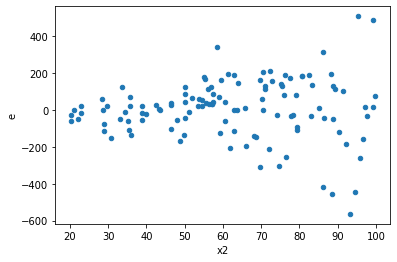

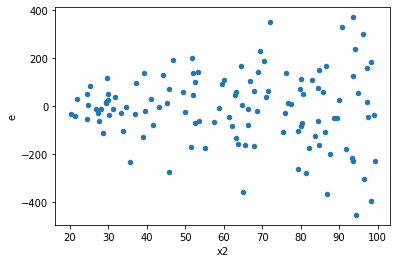

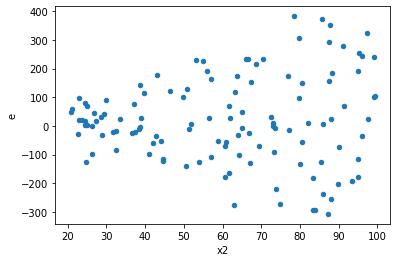

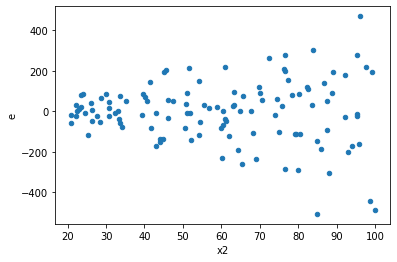

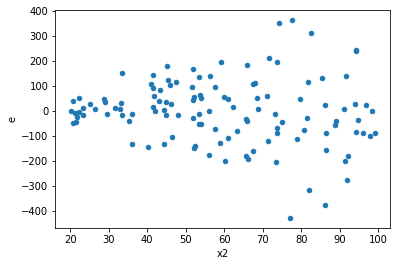

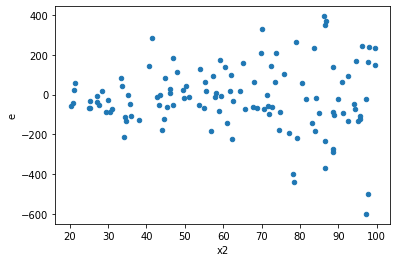

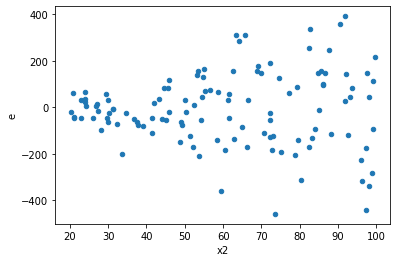

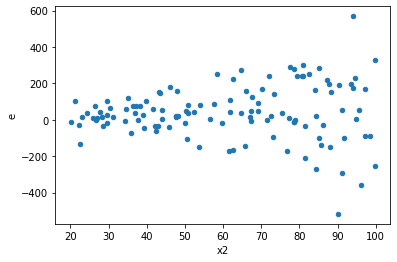

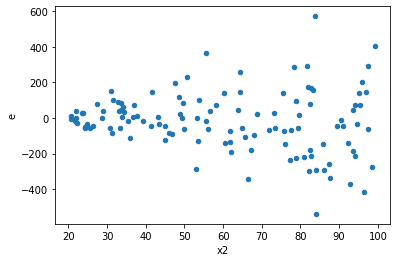

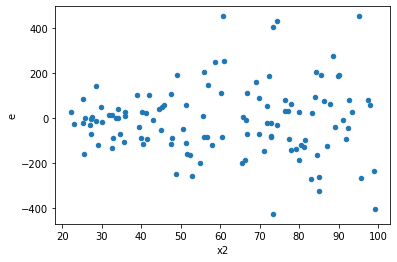

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,44.0,44.0,222463.65758602286,2162756.840438803,5055.992217864156,49153.56455542734,9.721843396387126,6.406652985901928e-12,0.9999999999967967,3.203326492950964e-12,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,389527.9551566676,1610312.498358275,8852.908071742446,36598.011326324435,4.134010093603191,6.649682577020144e-06,0.9999966751587115,3.324841288510072e-06,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,339036.867863114,1652049.446966154,7705.383360525318,37546.578340139866,4.872772266269191,6.227696986993436e-07,0.9999996886151507,3.113848493496718e-07,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,302110.4022285856,2105258.2688945695,6866.145505195128,47846.778838512946,6.9685063915861765,2.1377479786366393e-09,0.999999998931126,1.0688739893183197e-09,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,256439.04837998995,1414338.6727551832,5828.160190454317,32144.06074443598,5.515301517807163,9.41934501508257e-08,0.9999999529032749,4.709672507541285e-08,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,407544.31603270874,2426425.770844264,9262.3708189252,55146.04024646054,5.953771590939139,2.8140897168071888e-08,0.9999999859295514,1.4070448584035944e-08,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,211628.7829773007,1975533.6679997253,4809.745067665925,44898.49245453921,9.334900669969931,1.3318901537218153e-11,0.9999999999933405,6.6594507686090765e-12,Reject005=0 : Heteroscedasticity
7.0,44.0,44.0,186957.34937465016,2033129.5450446634,4249.030667605685,46207.48966010599,10.874830820212402,8.255618411112664e-13,0.9999999999995872,4.127809205556332e-13,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,224669.9925641558,2167689.2364976224,5106.136194639905,49265.66446585506,9.64832558081216,7.349010289203761e-12,0.9999999999963255,3.674505144601881e-12,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,222463.65758602286,2162756.840438803,5055.992217864156,49153.56455542734,9.721843396387126,6.406652985901928e-12,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,389527.9551566676,1610312.498358275,8852.908071742446,36598.011326324435,4.134010093603191,6.649682577020144e-06,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,339036.867863114,1652049.446966154,7705.383360525318,37546.578340139866,4.872772266269191,6.227696986993436e-07,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,302110.4022285856,2105258.2688945695,6866.145505195128,47846.778838512946,6.9685063915861765,2.1377479786366393e-09,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,256439.04837998995,1414338.6727551832,5828.160190454317,32144.06074443598,5.515301517807163,9.41934501508257e-08,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,407544.31603270874,2426425.770844264,9262.3708189252,55146.04024646054,5.953771590939139,2.8140897168071888e-08,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,211628.7829773007,1975533.6679997253,4809.745067665925,44898.49245453921,9.334900669969931,1.3318901537218153e-11,Reject005=0 : Heteroscedasticity
7.0,44.0,44.0,186957.34937465016,2033129.5450446634,4249.030667605685,46207.48966010599,10.874830820212402,8.255618411112664e-13,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,224669.9925641558,2167689.2364976224,5106.136194639905,49265.66446585506,9.64832558081216,7.349010289203761e-12,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    999
Reject005=1 : Homoscedasticity        1
Name: Result_test, dtype: int64